In [2]:
from Crypto.Util.number import getPrime, inverse, bytes_to_long, long_to_bytes, GCD
import random

# Prerequisites

1. Modular exponentiation
- https://crypto.stanford.edu/pbc/notes/numbertheory/exp.html
- https://en.wikipedia.org/wiki/Modular_exponentiation
- https://www.geeksforgeeks.org/modular-exponentiation-power-in-modular-arithmetic/
2. Modular multiplicative inverse
- https://en.wikipedia.org/wiki/Modular_multiplicative_inverse
- What is a trapdoor?
- https://en.wikipedia.org/wiki/Trapdoor_function
3. **Discrete logarithm problem** -- check notebook
        

# Theory

- The diffictulty of Diffie-Hellman Key exchange is based on the difficulty of the **Discrete logarithm problem** => Check the mathematics/discrete_logarithm_problem to see its weaknesses
- Choosing the right group is important because poorly chosen groups can be leveraged to solve the DLP
- DH is vulnerable to man-in-the-middle attacks unless provided authentification
- Using the same parameters (Ex: secret keys)  multiple times might lead to some vulnerabilities


## Algorithm

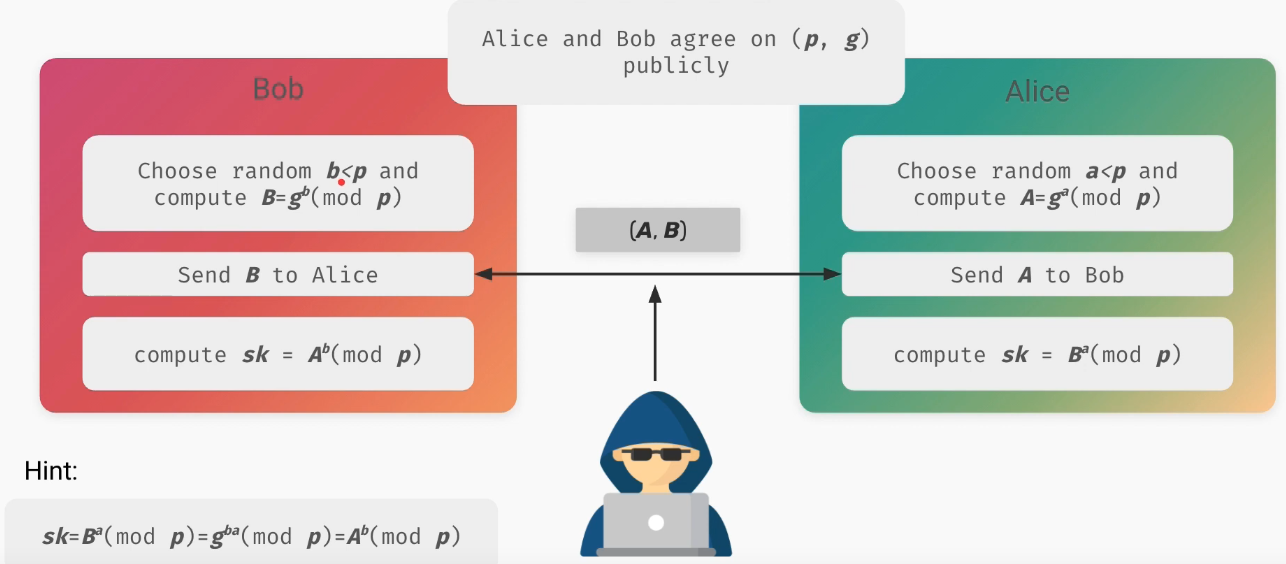
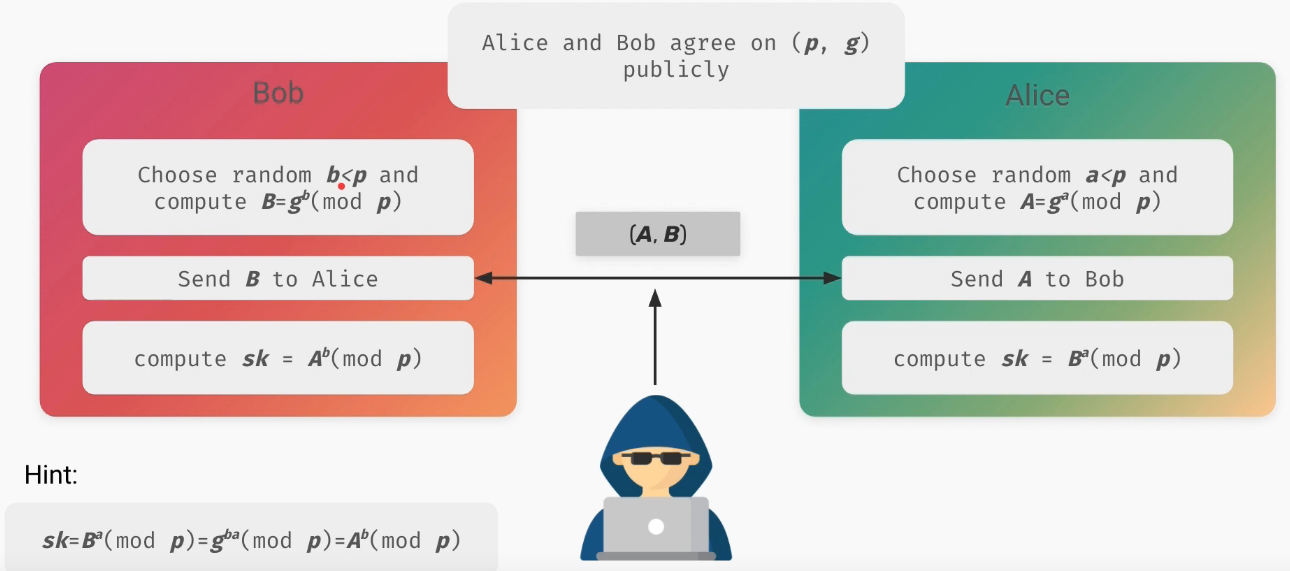

**Parameter creation**:
Choose large prime $p$  
Choose $g$ with large prime order

**Private computations**:  
$$\underbrace{A \equiv g^{a}(\bmod p)}_{\text {Alice computes this }} \quad \text { and } \quad \underbrace{B \equiv g^{b}(\bmod p)}_{\text {Bob computes this }}$$

* Then they exchange $A$ and $B$

**Shared secret**:
- Alice computes $B^{a}\bmod p$
- Bob computes $A^{b}(\bmod p)$  

*Proof*  
The shared secret value is $B^{a} \equiv\left(g^{b}\right)^{a} \equiv g^{a b} \equiv\left(g^{a}\right)^{b} \equiv A^{b}(\bmod p)$


# Code

In [3]:
p = getPrime(512)

while True:
    g = random.randint(p//4, p//2)
    if(GCD(p, g)==1):
        break
#or
g = 2
print(p, g)

10593592744623210659381228746082034003768487327137411025720625109621085163327354601408075211252690888066931748528114391339724790342797074121397957875486951 2


In [4]:
p, g

(10593592744623210659381228746082034003768487327137411025720625109621085163327354601408075211252690888066931748528114391339724790342797074121397957875486951,
 2)

In [5]:
#Private computations
a = bytes_to_long(b'very_secret_key')
b = bytes_to_long(b'another_mega_secrey_key')
A = pow(g, a, p)
B = pow(g, b, p)
print(A, B)

3539683588164635701776638670498982631169529656554785515560400866381659153951552069638896823097743114034913091837279311711085194449489010511785554905087936 9196915664783230264544502156703759025840369346065181498595554731535078212356029197617525171307426861200761097891348900198968154390002554862138470807619871


In [7]:
#Secret key
A_key = pow(B, a, p)
B_key = pow(A, b, p)

print(A_key == B_key)

True


# Resources
* Computerphile video: https://www.youtube.com/watch?v=NmM9HA2MQGI&ab_channel=Computerphile
* https://www.youtube.com/watch?v=Yjrfm_oRO0w&t=182s&ab_channel=Computerphile